<a href="https://colab.research.google.com/github/GermanOmar/ICM/blob/master/Taller2COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller #2



## Predecir el precio de un auto en función de sus características:

![](https://ecuador.patiotuerca.com/assets/materialTheme/images/openGraph_MotorValue_pt.png)

Iniciando

In [129]:
print ("Seguir los pasos de este cuaderno...")

Seguir los pasos de este cuaderno...


LIBRERIAS

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Importar data

In [131]:
!git clone https://github.com/GermanOmar/ICM

fatal: destination path 'ICM' already exists and is not an empty directory.


In [132]:
#Experimental data
dataset = pd.read_table('DataCARS.txt') 
#dataset.describe()
dataset.describe(include='all')

,Marca,Precio,Tipo,Recorrido,MotorV,Combustible,Year,Modelo
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


Tipo de datos:

In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marca        4345 non-null   object 
 1   Precio       4173 non-null   float64
 2   Tipo         4345 non-null   object 
 3   Recorrido    4345 non-null   int64  
 4   MotorV       4195 non-null   float64
 5   Combustible  4345 non-null   object 
 6   Year         4345 non-null   int64  
 7   Modelo       4345 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


Elimino parametros que no aportan al modelo

In [134]:
df = dataset.drop(labels='Modelo', axis=1)


Reviso si hay datos incompletos

In [135]:
df.isnull().sum()

Marca            0
Precio         172
Tipo             0
Recorrido        0
MotorV         150
Combustible      0
Year             0
dtype: int64

❗ faltan 172 datos de Precio y 150 de MotorV







Elimino datos incompletos

In [136]:
dfa = df.dropna()

In [137]:
dfa.isna().sum()

Marca          0
Precio         0
Tipo           0
Recorrido      0
MotorV         0
Combustible    0
Year           0
dtype: int64

Analizo distribución de parámetros:

Text(0.5, 1.0, 'Función de distribución de probabilidad (PDF)')

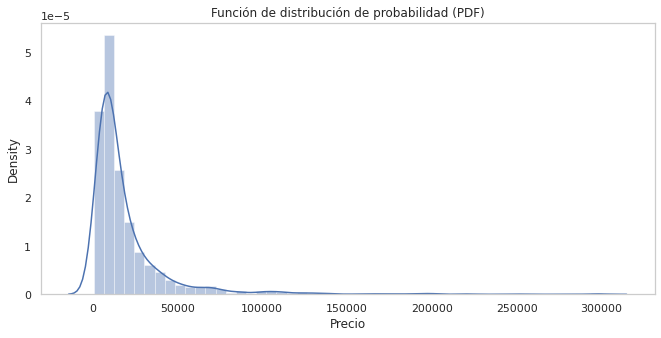

In [138]:
plt.figure(figsize=[11,5])
sns.distplot(dfa['Precio'])
plt.title('Función de distribución de probabilidad (PDF)')

Text(0.5, 1.0, 'MOTOR-V PDF')

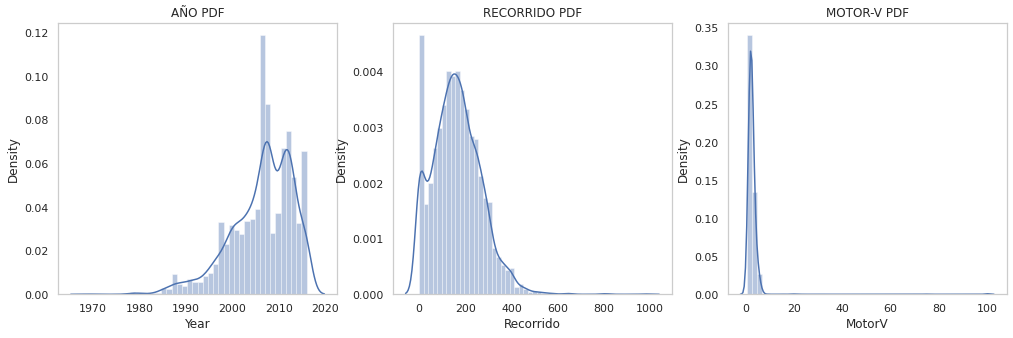

In [139]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(dfa['Year'])
plt.title('AÑO PDF')

plt.subplot(1,3,2)
sns.distplot(dfa['Recorrido'])
plt.title('RECORRIDO PDF')

plt.subplot(1,3,3)
sns.distplot(dfa['MotorV'])
plt.title('MOTOR-V PDF')

Remover outliers

In [140]:
q = dfa['Precio'].quantile(0.95)

data_1 = dfa[dfa['Precio']<q]

Text(0.5, 1.0, 'PRECIO PDF')

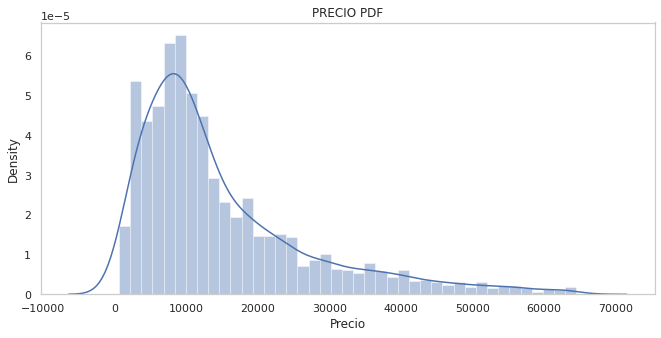

In [141]:
plt.figure(figsize=[11,5])
sns.distplot(data_1['Precio'])
plt.title('PRECIO PDF')

Text(0.5, 1.0, 'MotorV PDF')

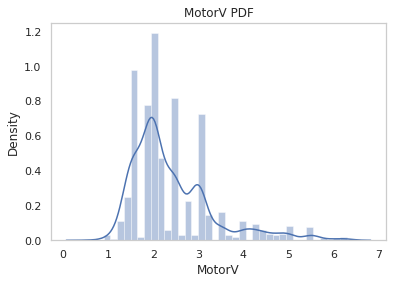

In [142]:
data_2 = data_1[data_1['MotorV']<6.5]

sns.distplot(data_2['MotorV'])
plt.title('MotorV PDF')

Datos limpios

In [143]:
cleaned_data = data_2.reset_index(drop=True)

In [144]:
cleaned_data.describe()

,Precio,Recorrido,MotorV,Year
count,3800.000000,3800.000000,3800.000000,3800.000000
mean,14949.782411,170.943421,2.401255,2005.948684
std,12211.198601,99.347499,0.915993,6.566304
min,600.000000,0.000000,0.600000,1969.000000
25%,6800.000000,100.000000,1.800000,2002.000000
50%,10900.000000,162.000000,2.000000,2007.000000
75%,19225.000000,234.000000,2.990000,2011.000000
max,64500.000000,810.000000,6.300000,2016.000000


In [161]:
cleaned_data.isnull().sum()

Marca          0
Precio         0
Tipo           0
Recorrido      0
MotorV         0
Combustible    0
Year           0
dtype: int64

Linealidad de los datos

Text(0.5, 1.0, 'Precio and MotorV')

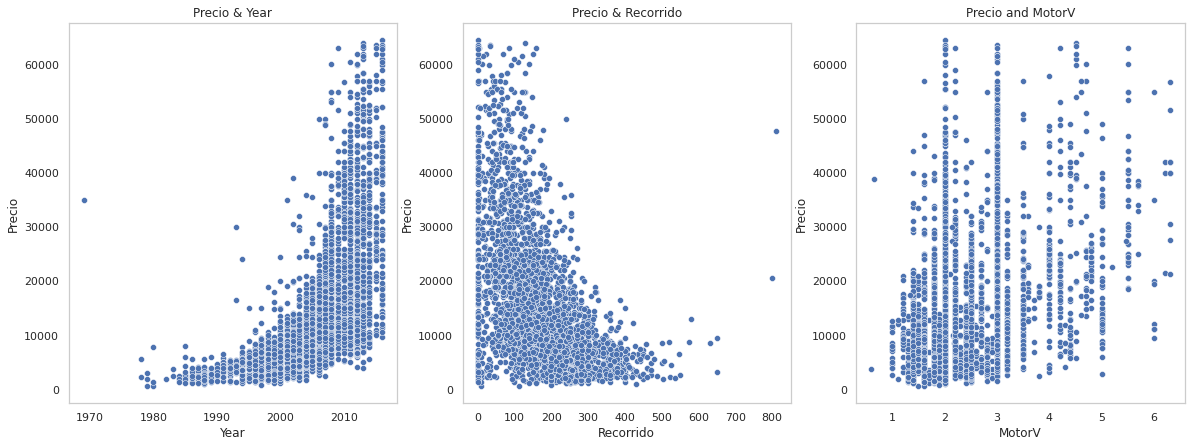

In [163]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Precio & Year")
sns.scatterplot(x='Year',y='Precio',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Precio & Recorrido")
sns.scatterplot(x='Recorrido',y='Precio',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Precio',x='MotorV',data=cleaned_data)
plt.title("Precio and MotorV")

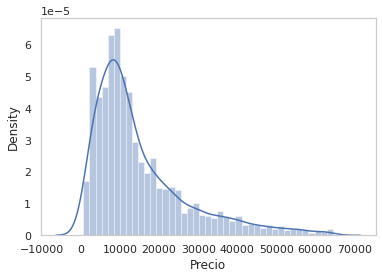

In [164]:
sns.distplot(cleaned_data['Precio'])

Selección de características

In [165]:
from sklearn.preprocessing import LabelEncoder
temp_data = cleaned_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['Precio'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Year           0.590227
Recorrido      0.510479
MotorV         0.396264
Tipo           0.384154
Marca          0.132357
Combustible    0.022539
dtype: float64


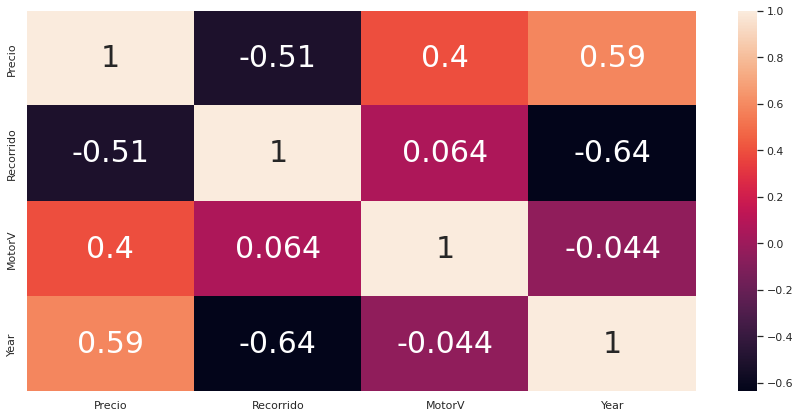

In [166]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(cleaned_data.corr(), annot=True)

In [167]:
print(cleaned_data['Combustible'].unique())
print(cleaned_data['Marca'].unique())
print(cleaned_data['Tipo'].unique())

['Petrol' 'Diesel' 'Gas' 'Other']
['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']


Elimino Tipo y combustible

In [171]:
data_fin = cleaned_data.drop(labels='Combustible', axis=1)
#data_fin = data_new.drop(labels='Modelo', axis=1)
data_fin

,Marca,Precio,Tipo,Recorrido,MotorV,Year
0,BMW,4200.0,sedan,277,2.0,1991
1,Mercedes-Benz,7900.0,van,427,2.9,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,2003
3,Audi,23000.0,crossover,240,4.2,2007
4,Toyota,18300.0,crossover,120,2.0,2011
...,...,...,...,...,...,...
3795,Volkswagen,11500.0,van,163,2.5,2008
3796,Toyota,17900.0,sedan,35,1.6,2014
3797,BMW,6500.0,sedan,1,3.5,1999
3798,BMW,8000.0,sedan,194,2.0,1985


In [172]:
data_fin.isnull().sum()

Marca        0
Precio       0
Tipo         0
Recorrido    0
MotorV       0
Year         0
dtype: int64

Transformar variables categóricas (qualitativas) en numéricas (cuantitativas)

In [173]:
data_final = pd.get_dummies(data_fin,drop_first=True)

In [174]:
data_final.head()

,Precio,Recorrido,MotorV,Year,Marca_BMW,Marca_Mercedes-Benz,Marca_Mitsubishi,Marca_Renault,Marca_Toyota,Marca_Volkswagen,Tipo_hatch,Tipo_other,Tipo_sedan,Tipo_vagon,Tipo_van
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0


In [175]:
data_final.isna().sum()

Precio                 0
Recorrido              0
MotorV                 0
Year                   0
Marca_BMW              0
Marca_Mercedes-Benz    0
Marca_Mitsubishi       0
Marca_Renault          0
Marca_Toyota           0
Marca_Volkswagen       0
Tipo_hatch             0
Tipo_other             0
Tipo_sedan             0
Tipo_vagon             0
Tipo_van               0
dtype: int64

In [176]:
data_final

,Precio,Recorrido,MotorV,Year,Marca_BMW,Marca_Mercedes-Benz,Marca_Mitsubishi,Marca_Renault,Marca_Toyota,Marca_Volkswagen,Tipo_hatch,Tipo_other,Tipo_sedan,Tipo_vagon,Tipo_van
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,11500.0,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1
3796,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0
3797,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0
3798,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0


Dividir data

In [177]:
X=data_final.drop('Precio',axis=1)
Y=data_final['Precio'][:,None]

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 3040  test samples: 760


Escalo dataset

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Inicio modelo de Machine learning

Algoritmo XGBR

In [180]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9986648806656333


-XGBRegressor -
------------------
MSE test: 26683294.835878782

R2:  0.8349468416898276
RMSE:  5165.5875595985
MAE:  3096.345569772821



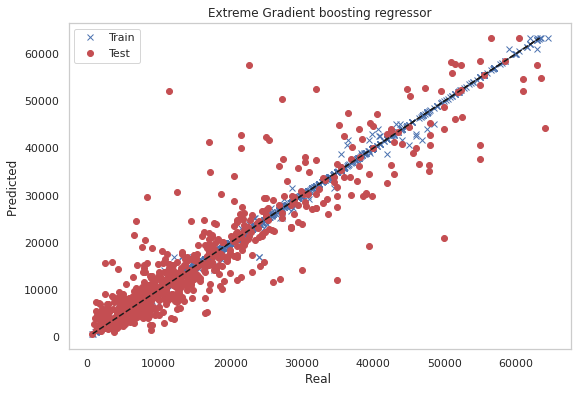

In [181]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

y_star_train = xgbr.predict(X_train)
y_pred = xgbr.predict(X_test)

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted ')
plt.xlabel('Real ')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
print()

Redes neuronales


R2_train:  0.9986648806656333
R2:  0.8340308068601439
RMSE:  5165.5875595985
MAE:  3387.1327069645085



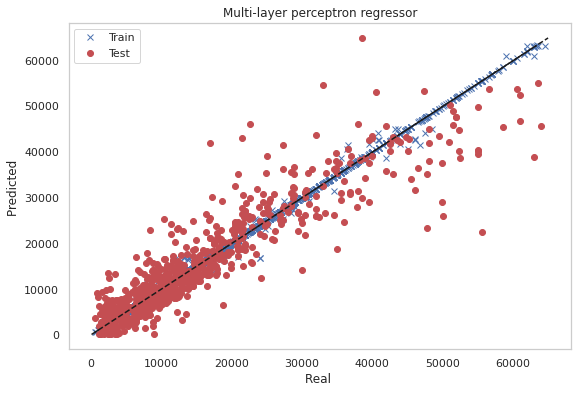

In [182]:
from sklearn.neural_network import MLPRegressor

MLP =MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=3000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
#MLP = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), activation='relu', solver='adam', max_iter=800)

#START TRAINING
MLP.fit(X_train,y_train)
#PREDICTION
y_pred=MLP.predict(X_test)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted ')
plt.xlabel('Real ')
plt.title("Multi-layer perceptron regressor")
print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
print()

# PREDICCIONES

In [184]:
def prediction(Marca, Recorrido, MotorV,  Year):
    # feature scaling on:
    scaled_value = scaler.transform([[float(Marca), ]])
    
    Marca = scaled_value[0,1]
   
    
    Year = int(Year)
    Recorrido = int(Recorrido)
    MotorV = float(MotorV)
    
    return rf_random.predict([[Marca, Year, Recorrido, MotorV]])